# Lab Solution - Deciscion Trees to predict Diabetes
This notebook serves as the starter code and lab description for teh Lab covering **Chapter 19 - Learning from Examples (Part 1)** from the book *Artificial Intelligence: A Modern Approach.*

In [2]:
# pip install sklearn
# pip install pandas
# pip install six
# pip install pydotplus
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics # is used to create classification results
from sklearn.tree import export_graphviz # is used for plotting the decision tree
from six import StringIO # is used for plotting the decision tree
from IPython.display import Image # is used for plotting the decision tree
from IPython.core.display import HTML # is used for showing the confusion matrix
import pydotplus # is used for plotting the decision tree

## OVERVIEW

This lab is designed to guide you through a real life classification task which can be solved using Decision Tree Learning. The dataset we are going to consider for this task is "[Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)" \[[Download Link](https://gist.github.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f)\]. 

### Dataset

The objective of the dataset is to
diagnostically predict whether or not a patient has diabetes, based on certain diagnostic
measurements included in the dataset. Several constraints were placed on the selection
of these instances from a larger database.

Each dataset record contains the following measurements:
 1. Number of times the patient has been pregnant
 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 3. Diastolic blood pressure (mm Hg)
 4. Triceps skin fold thickness (mm)
 5. 2-Hour serum insulin (mu U/ml)
 6. Body mass index (weight in kg/(height in m)^2)
 7. Diabetes pedigree function
 8. Age (years)
 9. Class variable (0 for doesn't have diabetes or 1 for has diabetes)

Let's load up the dataset:

In [4]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names, skiprows=9)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Now let's break the data into training information (extracted features) and the target label (which we expect the model to learn to predict).

In [3]:
feature_cols = ['pregnant','glucose','bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = pima[feature_cols] # Features
y = pima.label # Target variable

For the next step, we use `train_test_split` to split the dataset to 70% training and 30% test sets (you can also try 80%/20%).

In [4]:
# TODO Split dataset into training set and test set and store the results in 'X_train', 'X_test', 'y_train', 'y_test'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Train a [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) (look at the API documentation of it and lookup for some examples on how to train it) on the splitted train data. Use `criterion=‘entropy’` parameter to train a decision tree using the Entropy attribute selection method, as we discussed in class.

In [5]:
# TODO Create the Decision Tree classifier object
clf = DecisionTreeClassifier(criterion='entropy')
# TODO Train the Decision Tree Classifier
clf = clf.fit(X_train,y_train)

Now using the trained model predict the target labels for the test set input features.

In [6]:
# TODO Predict the response for test dataset and store it in 'y_pred'
y_pred = clf.predict(X_test)

The next cell provides the precision score of our classifier:

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: {:.2f}%\n".format(metrics.accuracy_score(y_test, y_pred)*100))
display(HTML(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns=["Doesn't Have Cancer", "Has Cancer"], index=["Doesn't Have Cancer", "Has Cancer"]).to_html()))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 73.16%



,Doesn't Have Cancer,Has Cancer
Doesn't Have Cancer,114,32
Has Cancer,30,55


              precision    recall  f1-score   support

           0       0.79      0.78      0.79       146
           1       0.63      0.65      0.64        85

    accuracy                           0.73       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



Now that we have created a decision tree, let's see what it looks like when we visualize it. The Scikit-learn's `export_graphviz` function can help visualize the decision tree. We can use this on our Jupyter notebooks. 

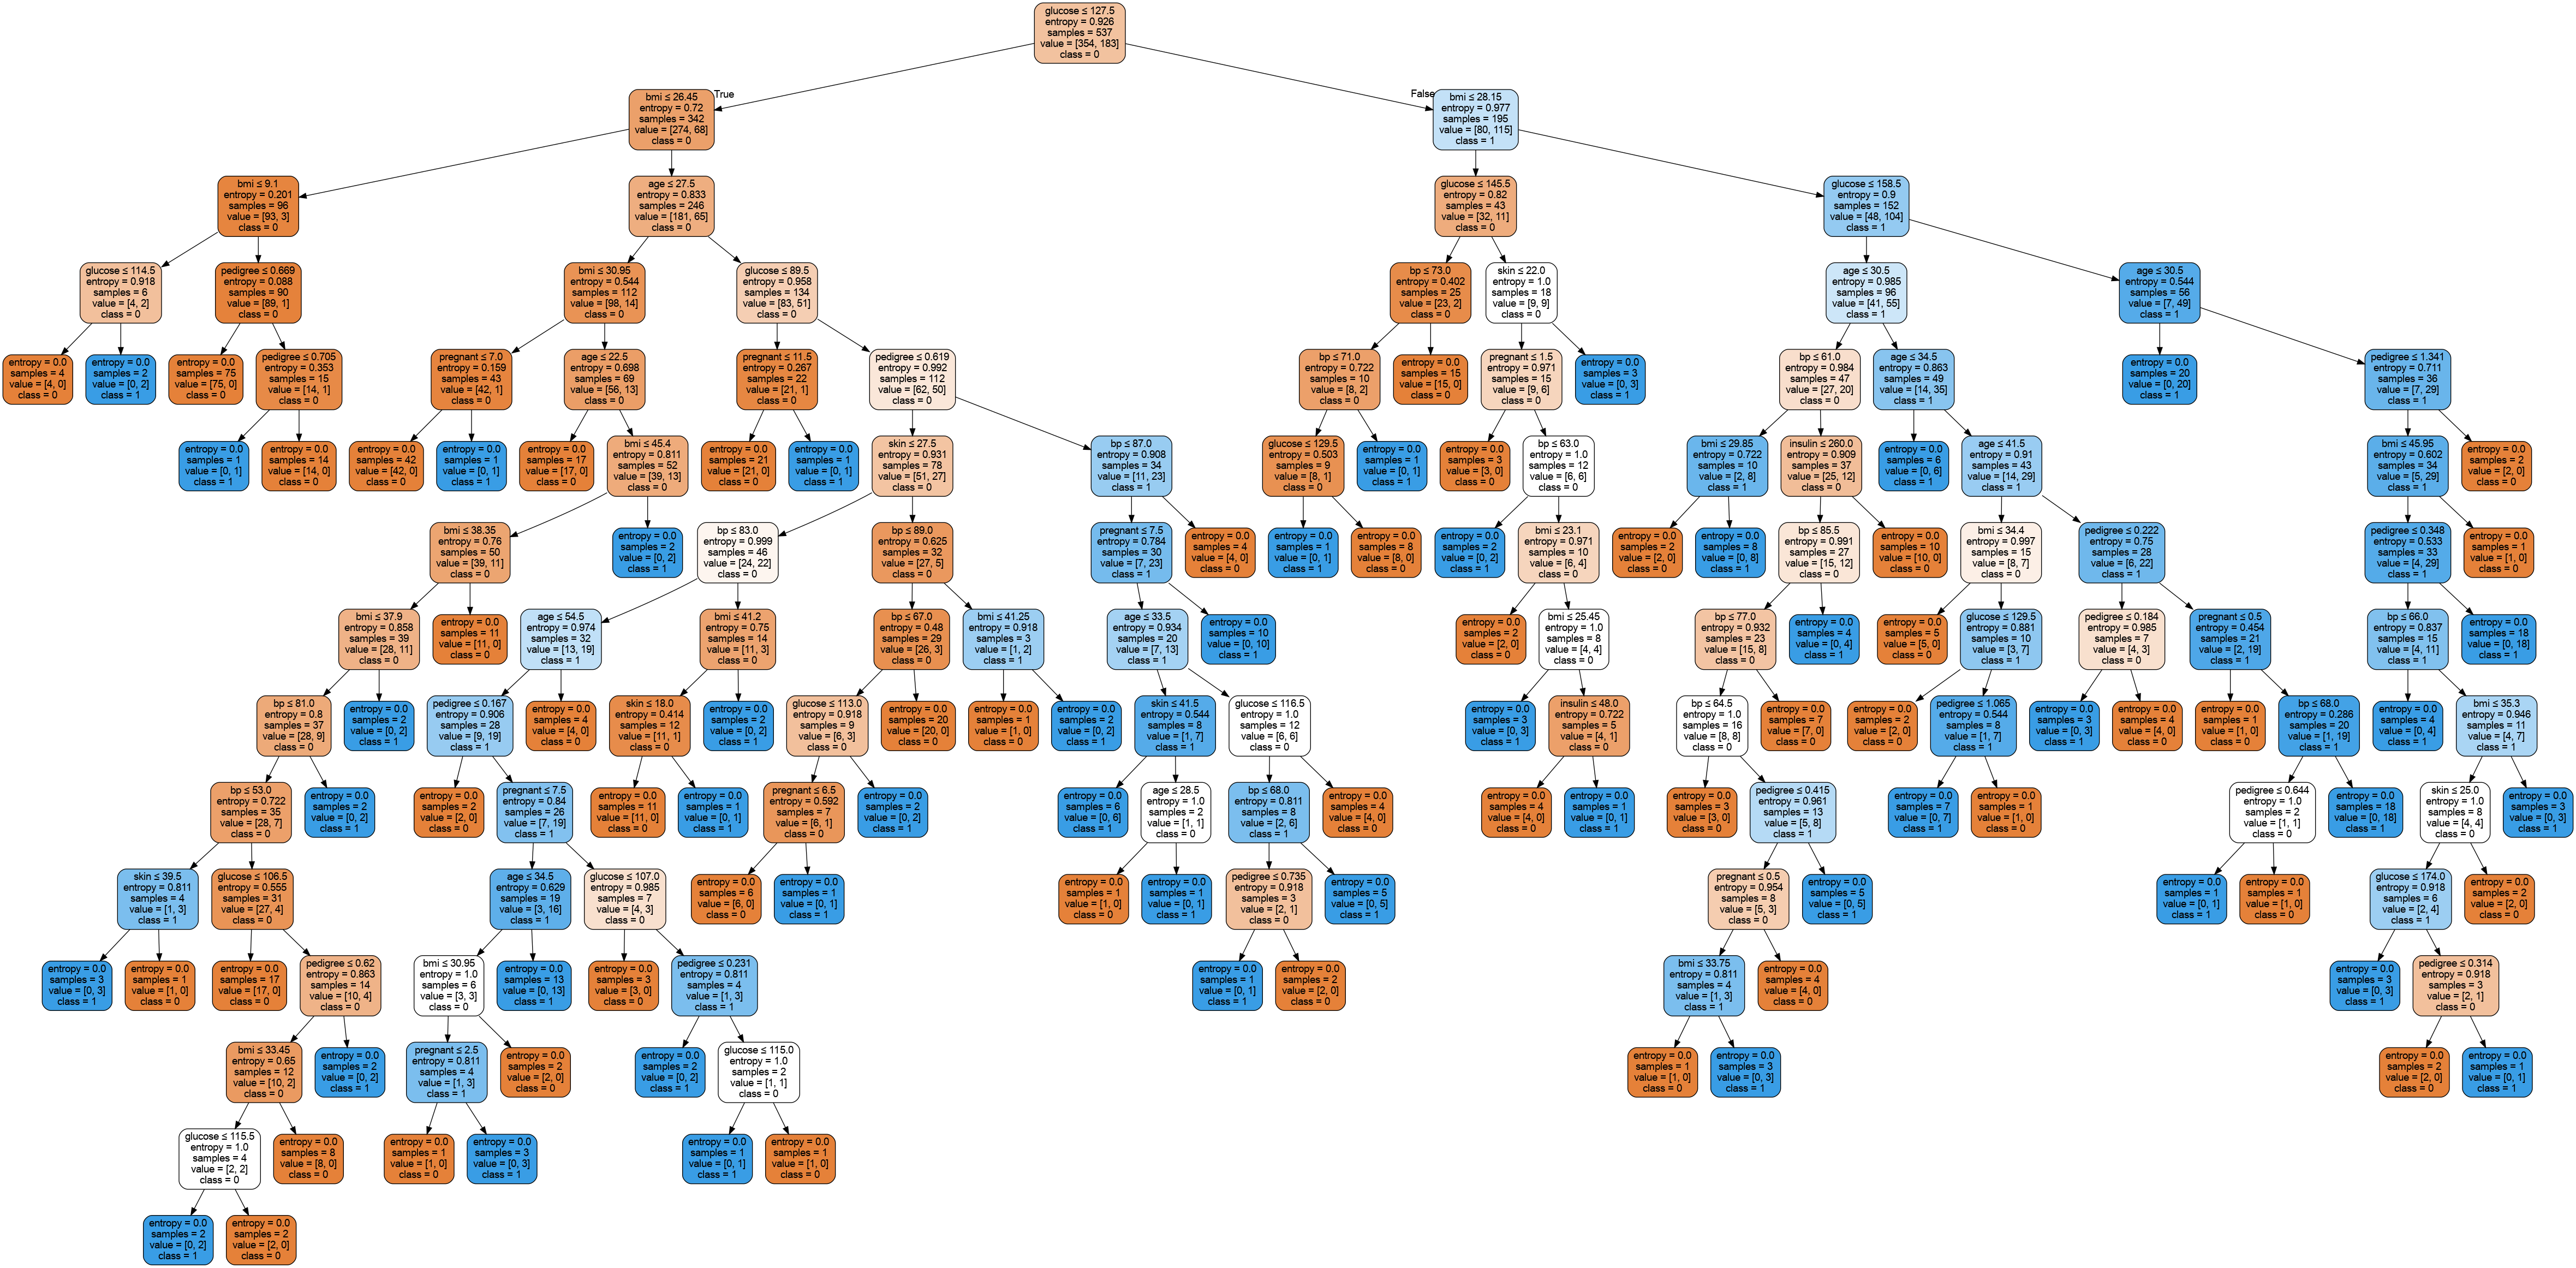

In [8]:
# If you got this error: "InvocationException: GraphViz's executables not found"
# Try running this command: "sudo apt install graphviz" (for linux) or "brew install graphviz" (for macos)

# You may also need to run: "pip install graphviz"

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Think of an improvement (or search for it, there are many) to what you have so far, improve the classification performance of the classifier and re-test it using the exact same test procedure that you did earlier. Draw the modified decision tree and store it in `'diabetes2.png'`. Explain why the improvement happened?

Accuracy: 77.06%



,Doesn't Have Cancer,Has Cancer
Doesn't Have Cancer,124,22
Has Cancer,31,54


              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



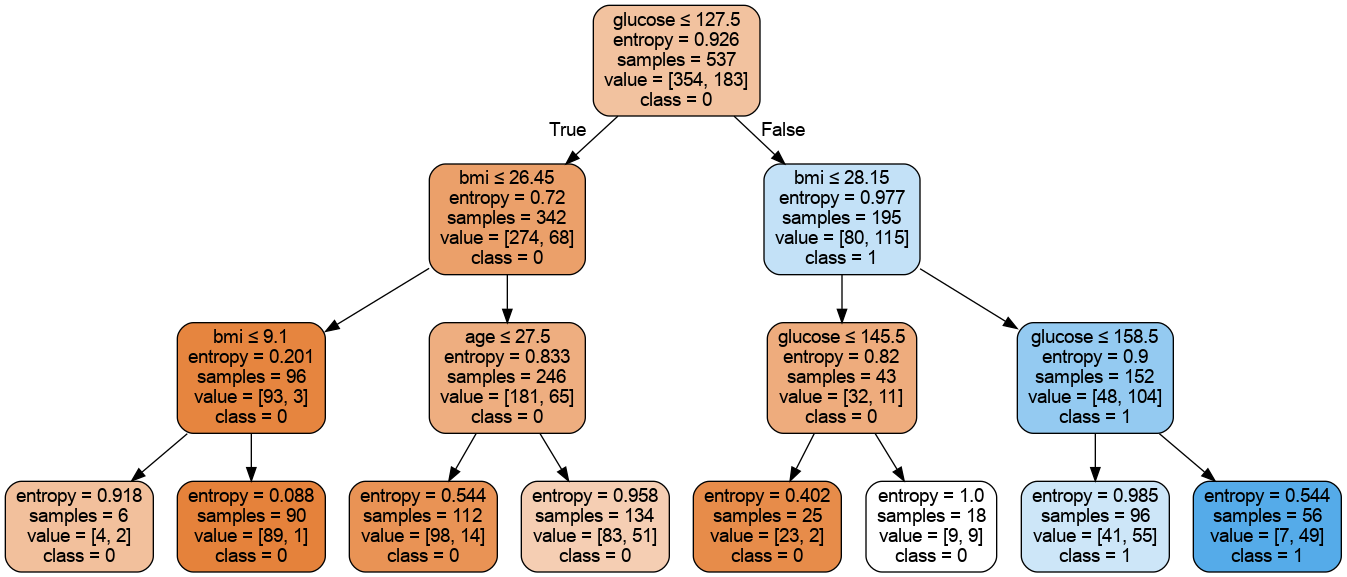

In [9]:
# TODO Implement your modified classification procedure here
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: {:.2f}%\n".format(metrics.accuracy_score(y_test, y_pred)*100))
display(HTML(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns=["Doesn't Have Cancer", "Has Cancer"], index=["Doesn't Have Cancer", "Has Cancer"]).to_html()))
print(metrics.classification_report(y_test, y_pred))
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())